In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
print("Keys", iris.keys())
print("Feature names", iris.feature_names)

Keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

In [3]:
perceptron_classifier = Perceptron(random_state=42)
perceptron_classifier.fit(X, y)

Perceptron(random_state=42)

In [4]:
X_new = [[2, 0.5], [3, 1]]
y_pred = perceptron_classifier.predict(X_new)
y_pred

array([ True, False])

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [6]:
# Regression Using MLP

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipeline = Pipeline([("std_Scaler", StandardScaler()),
                    ("mlp_reg", MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42, max_iter=500)),
                    ])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.5332635551826002

In [7]:
# Classification using MLP

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=43)

pipeline = Pipeline([("std_scaler", StandardScaler()),
                    ("mlp_class", MLPClassifier(hidden_layer_sizes=[10, 10, 10], random_state=42, max_iter=800)),
                    ])


pipeline.fit(X_train, y_train)

score = pipeline.score(X_test, y_test)
score

0.9736842105263158

In [9]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.083)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
  "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
# Scaling the data

X_train, X_test, X_valid = X_train / 255.0, X_test / 255.0, X_valid / 255.0

In [13]:
tf.random.set_seed(42)


model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))






Metal device set to: Apple M2


2023-03-01 15:14:45.193316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-01 15:14:45.193357: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [18]:
from tensorflow.keras.optimizers.legacy import SGD

model.compile(loss="sparse_categorical_crossentropy",
             optimizer=SGD(),
             metrics=["accuracy"],
             )

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
  12/1720 [..............................] - ETA: 8s - loss: 2.1533 - accuracy: 0.3229  

2023-03-01 15:21:19.752347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1720/1720 [==============================] - ETA: 0s - loss: 0.7123 - accuracy: 0.7646

2023-03-01 15:21:27.103403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1720/1720 [==============================] - 8s 4ms/step - loss: 0.7123 - accuracy: 0.7646 - val_loss: 0.5852 - val_accuracy: 0.7992
Epoch 2/30
1720/1720 [==============================] - 7s 4ms/step - loss: 0.4868 - accuracy: 0.8310 - val_loss: 0.4568 - val_accuracy: 0.8438
Epoch 3/30
1720/1720 [==============================] - 7s 4ms/step - loss: 0.4423 - accuracy: 0.8459 - val_loss: 0.4432 - val_accuracy: 0.8426
Epoch 4/30
1720/1720 [==============================] - 7s 4ms/step - loss: 0.4140 - accuracy: 0.8546 - val_loss: 0.4200 - val_accuracy: 0.8528
Epoch 5/30
1720/1720 [==============================] - 7s 4ms/step - loss: 0.3940 - accuracy: 0.8625 - val_loss: 0.4026 - val_accuracy: 0.8612
Epoch 6/30
1720/1720 [==============================] - 7s 4ms/step - loss: 0.3779 - accuracy: 0.8674 - val_loss: 0.3959 - val_accuracy: 0.8633
Epoch 7/30
1720/1720 [==============================] - 7s 4ms/step - loss: 0.3654 - accuracy: 0.8711 - val_loss: 0.4748 - val_accuracy: 0.8251
Epo

<AxesSubplot: >

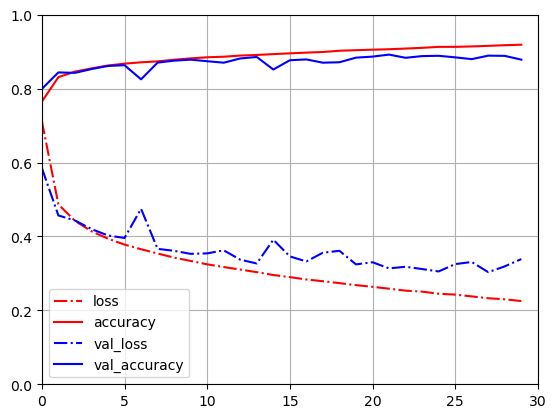

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(xlim=[0, 30], ylim=[0, 1], grid = True, style=["r-.", "r-", "b-.", "b-"])

In [27]:
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1607 - accuracy: 0.9430 - val_loss: 0.3068 - val_accuracy: 0.8942
Epoch 2/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1589 - accuracy: 0.9434 - val_loss: 0.2962 - val_accuracy: 0.8930
Epoch 3/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1559 - accuracy: 0.9444 - val_loss: 0.3208 - val_accuracy: 0.8857
Epoch 4/20
1720/1720 [==============================] - 8s 4ms/step - loss: 0.1538 - accuracy: 0.9452 - val_loss: 0.3057 - val_accuracy: 0.8968
Epoch 5/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1508 - accuracy: 0.9465 - val_loss: 0.3076 - val_accuracy: 0.8968
Epoch 6/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1490 - accuracy: 0.9478 - val_loss: 0.3268 - val_accuracy: 0.8898
Epoch 7/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1466 - accuracy: 0.9477 - val_loss: 0.3380 - val_accuracy:

<AxesSubplot: >

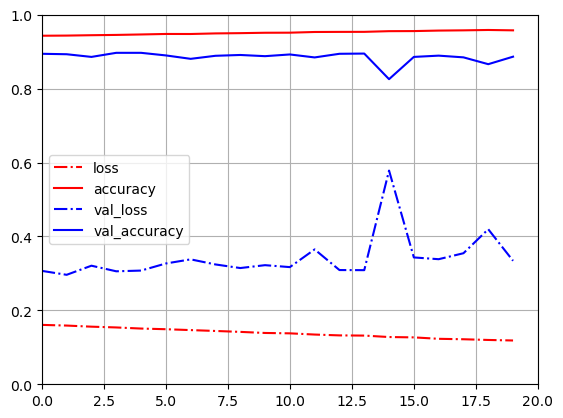

In [32]:
pd.DataFrame(history.history).plot(xlim=[0, 20], ylim=[0, 1], grid = True, style=["r-.", "r-", "b-.", "b-"])

In [34]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1156 - accuracy: 0.9599 - val_loss: 0.3290 - val_accuracy: 0.8936
Epoch 2/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1142 - accuracy: 0.9604 - val_loss: 0.3111 - val_accuracy: 0.8988
Epoch 3/20
1720/1720 [==============================] - 9s 5ms/step - loss: 0.1125 - accuracy: 0.9610 - val_loss: 0.3510 - val_accuracy: 0.8829
Epoch 4/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1105 - accuracy: 0.9619 - val_loss: 0.3193 - val_accuracy: 0.9008
Epoch 5/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1086 - accuracy: 0.9623 - val_loss: 0.3279 - val_accuracy: 0.8970
Epoch 6/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1070 - accuracy: 0.9626 - val_loss: 0.3497 - val_accuracy: 0.8908
Epoch 7/20
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1056 - accuracy: 0.9638 - val_loss: 0.3332 - val_accuracy:

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4033 - accuracy: 0.8844


[0.40326324105262756, 0.8844000697135925]

In [47]:
X_new = X_test[ :3]
y_proba = model.predict(X_new)
y_proba.round(3)

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
y_pred = y_proba.argmax(axis = -1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [53]:
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,random_state=43, test_size=0.2)

normalization_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1: ])

model = tf.keras.Sequential([
    normalization_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
])


In [57]:
from tensorflow.keras.optimizers.legacy import Adam

model.compile(loss = "mse",
             optimizer = Adam(),
             metrics = ["RootMeanSquaredError"])
normalization_layer.adapt(X_train)

In [58]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-03-01 19:11:43.986330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


413/413 [==============================] - ETA: 0s - loss: 0.7292 - root_mean_squared_error: 0.8539

2023-03-01 19:11:46.329467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


413/413 [==============================] - 3s 6ms/step - loss: 0.7292 - root_mean_squared_error: 0.8539 - val_loss: 0.3971 - val_root_mean_squared_error: 0.6301
Epoch 2/30
413/413 [==============================] - 2s 5ms/step - loss: 0.3983 - root_mean_squared_error: 0.6311 - val_loss: 0.3724 - val_root_mean_squared_error: 0.6103
Epoch 3/30
413/413 [==============================] - 2s 5ms/step - loss: 0.3731 - root_mean_squared_error: 0.6108 - val_loss: 0.3446 - val_root_mean_squared_error: 0.5870
Epoch 4/30
413/413 [==============================] - 2s 5ms/step - loss: 0.3496 - root_mean_squared_error: 0.5912 - val_loss: 0.3775 - val_root_mean_squared_error: 0.6144
Epoch 5/30
413/413 [==============================] - 2s 5ms/step - loss: 0.3384 - root_mean_squared_error: 0.5817 - val_loss: 0.3301 - val_root_mean_squared_error: 0.5746
Epoch 6/30
413/413 [==============================] - 2s 5ms/step - loss: 0.3215 - root_mean_squared_error: 0.5670 - val_loss: 0.3432 - val_root_mean_s

<AxesSubplot: >

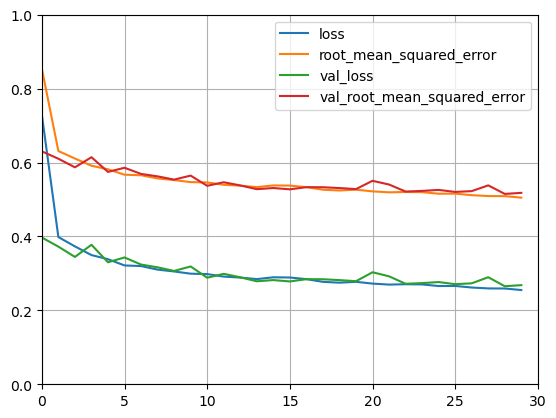

In [62]:
pd.DataFrame(history.history).plot(xlim=[0, 30], ylim=[0, 1], grid = True)

In [63]:
y_pred = model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 3ms/step - loss: 0.2774 - root_mean_squared_error: 0.5267


In [5]:
# Complex Model Using Functional API

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=43, test_size=0.2)



In [11]:
normalization_layer = tf.keras.layers.Normalization()

hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()

input_ = tf.keras.layers.Input(shape=X_train.shape[1: ])
output_layer = tf.keras.layers.Dense(1)

normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)


model = tf.keras.Model(inputs = [input_], outputs = [output])

from tensorflow.keras.optimizers.legacy import Adam

model.compile(loss = "mse",
             optimizer = Adam(),
             metrics = ["RootMeanSquaredError"])
normalization_layer.adapt(X_train)




Metal device set to: Apple M2


2023-03-04 00:15:42.271939: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-04 00:15:42.272412: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-04 00:15:42.436634: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-04 00:15:42.486756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [12]:
model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
 12/413 [..............................] - ETA: 1s - loss: 6.6620 - root_mean_squared_error: 2.5811  

2023-03-04 00:15:45.991073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


412/413 [============================>.] - ETA: 0s - loss: 1.2607 - root_mean_squared_error: 1.1228

2023-03-04 00:15:47.965311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


413/413 [==============================] - 2s 5ms/step - loss: 1.2589 - root_mean_squared_error: 1.1220 - val_loss: 0.5280 - val_root_mean_squared_error: 0.7266
Epoch 2/40
413/413 [==============================] - 2s 5ms/step - loss: 0.4913 - root_mean_squared_error: 0.7009 - val_loss: 0.4282 - val_root_mean_squared_error: 0.6543
Epoch 3/40
413/413 [==============================] - 2s 5ms/step - loss: 0.4256 - root_mean_squared_error: 0.6524 - val_loss: 0.3913 - val_root_mean_squared_error: 0.6255
Epoch 4/40
413/413 [==============================] - 2s 5ms/step - loss: 0.3948 - root_mean_squared_error: 0.6284 - val_loss: 0.3731 - val_root_mean_squared_error: 0.6108
Epoch 5/40
413/413 [==============================] - 2s 5ms/step - loss: 0.4050 - root_mean_squared_error: 0.6364 - val_loss: 0.3615 - val_root_mean_squared_error: 0.6012
Epoch 6/40
413/413 [==============================] - 2s 5ms/step - loss: 0.3688 - root_mean_squared_error: 0.6073 - val_loss: 0.3509 - val_root_mean_s

In [18]:
# What if we want some features to use wide path and others to use other path


input_wide = tf.keras.Input(shape=[5])
input_deep = tf.keras.Input(shape=[6])

deep_normalization_layer = tf.keras.layers.Normalization()
wide_normalization_layer = tf.keras.layers.Normalization()

hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")


deep_normalization = deep_normalization_layer(input_deep)
wide_normalization = wide_normalization_layer(input_wide)

hidden1 = hidden_layer1(deep_normalization)
hidden2 = hidden_layer2(hidden1)

concat = tf.keras.layers.concatenate([hidden2, wide_normalization])
output_layer = tf.keras.layers.Dense(1)

output = output_layer(concat)

model = tf.keras.Model(inputs = [input_deep, input_wide], outputs = [output])





In [6]:
# from tensorflow.keras.optimizers.legacy import Adam


# model.compile(loss = "mse",
#              optimizer = Adam(),
#              metrics = ["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[ : ,  :5], X_train[ : , 2: ]
X_valid_wide, X_valid_deep = X_valid[ : ,  :5], X_valid[ : , 2: ]
X_test_wide, X_test_deep = X_test[ : ,  :5], X_test[ : , 2: ]

# deep_normalization_layer.adapt(X_train_deep)
# wide_normalization_layer.adapt(X_train_wide)

In [21]:
model_history = model.fit((X_train_deep, X_train_wide), y_train, 
                          epochs=40, 
                          validation_data=((X_valid_deep, X_valid_wide), y_valid))





Epoch 1/40
  1/413 [..............................] - ETA: 2:15 - loss: 7.5041 - root_mean_squared_error: 2.7394

2023-03-04 01:15:24.990860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


413/413 [==============================] - ETA: 0s - loss: 1.9069 - root_mean_squared_error: 1.3809

2023-03-04 01:15:27.105418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


413/413 [==============================] - 3s 5ms/step - loss: 1.9069 - root_mean_squared_error: 1.3809 - val_loss: 0.7179 - val_root_mean_squared_error: 0.8473
Epoch 2/40
413/413 [==============================] - 2s 5ms/step - loss: 0.5897 - root_mean_squared_error: 0.7679 - val_loss: 0.5174 - val_root_mean_squared_error: 0.7193
Epoch 3/40
413/413 [==============================] - 2s 5ms/step - loss: 0.4868 - root_mean_squared_error: 0.6977 - val_loss: 0.4651 - val_root_mean_squared_error: 0.6820
Epoch 4/40
413/413 [==============================] - 2s 5ms/step - loss: 0.4353 - root_mean_squared_error: 0.6597 - val_loss: 0.4178 - val_root_mean_squared_error: 0.6464
Epoch 5/40
413/413 [==============================] - 2s 5ms/step - loss: 0.4018 - root_mean_squared_error: 0.6339 - val_loss: 0.3854 - val_root_mean_squared_error: 0.6208
Epoch 6/40
413/413 [==============================] - 2s 5ms/step - loss: 0.3776 - root_mean_squared_error: 0.6145 - val_loss: 0.3716 - val_root_mean_s

<AxesSubplot: >

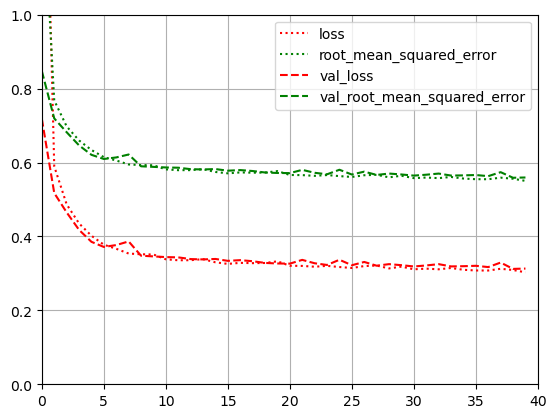

In [27]:
pd.DataFrame(model_history.history).plot(xlim = [0, 40], ylim = [0, 1], grid = True, style = ["r:", "g:", "r--", "g--"])



In [27]:
import tensorflow as tf
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        
        self.hidden1 = tf.keras.layers.Dense(units, activation = activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation = activation)
        
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)

        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)

        concat = tf.keras.layers.concatenate([norm_wide, hidden2])

        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)


        return output, aux_output
        
        
model = WideAndDeepModel(30, activation = "relu", name = "my_model")



In [28]:


from tensorflow.keras.optimizers.legacy import Adam
model.compile(loss = "mse",
              loss_weights=[0.9, 0.1],
             optimizer = Adam(),
              metrics = ["RootMeanSquaredError"],)

model.norm_layer_deep.adapt(X_train_deep)
model.norm_layer_wide.adapt(X_train_wide)


2023-03-04 23:55:21.997259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-04 23:55:22.010926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-04 23:55:22.666821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-04 23:55:22.680605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [29]:
model_history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), 
                          epochs=20, 
                          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))





Epoch 1/20
  1/413 [..............................] - ETA: 4:06 - loss: 6.8854 - output_1_loss: 6.9664 - output_2_loss: 6.1573 - output_1_root_mean_squared_error: 2.6394 - output_2_root_mean_squared_error: 2.4814

2023-03-04 23:55:25.137903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


413/413 [==============================] - ETA: 0s - loss: 1.8189 - output_1_loss: 1.7899 - output_2_loss: 2.0806 - output_1_root_mean_squared_error: 1.3379 - output_2_root_mean_squared_error: 1.4424

2023-03-04 23:55:28.292358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


413/413 [==============================] - 4s 8ms/step - loss: 1.8189 - output_1_loss: 1.7899 - output_2_loss: 2.0806 - output_1_root_mean_squared_error: 1.3379 - output_2_root_mean_squared_error: 1.4424 - val_loss: 0.7068 - val_output_1_loss: 0.6901 - val_output_2_loss: 0.8568 - val_output_1_root_mean_squared_error: 0.8307 - val_output_2_root_mean_squared_error: 0.9257
Epoch 2/20
413/413 [==============================] - 3s 8ms/step - loss: 0.6209 - output_1_loss: 0.6049 - output_2_loss: 0.7649 - output_1_root_mean_squared_error: 0.7778 - output_2_root_mean_squared_error: 0.8746 - val_loss: 0.5275 - val_output_1_loss: 0.5143 - val_output_2_loss: 0.6462 - val_output_1_root_mean_squared_error: 0.7171 - val_output_2_root_mean_squared_error: 0.8039
Epoch 3/20
413/413 [==============================] - 3s 8ms/step - loss: 0.5052 - output_1_loss: 0.4920 - output_2_loss: 0.6239 - output_1_root_mean_squared_error: 0.7014 - output_2_root_mean_squared_error: 0.7899 - val_loss: 0.5057 - val_out

In [30]:
model.save("my_model", save_format = "tf")

INFO:tensorflow:Assets written to: my_model/assets


In [2]:
loaded_model = tf.keras.models.load_model("my_model")


2023-03-06 15:50:37.175542: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-06 15:50:37.175899: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2


In [11]:
# Callbacks
import tensorflow as tf


checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only = True)

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [7]:
model_history = loaded_model.fit((X_train_wide, X_train_deep), (y_train, y_train), 
                          epochs=20, 
                          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[checkpoint_cb])

Epoch 1/20


2023-03-06 15:51:53.003869: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/413 [..............................] - ETA: 2:59 - loss: 0.2371 - output_1_loss: 0.2231 - output_2_loss: 0.3637 - output_1_root_mean_squared_error: 0.4723 - output_2_root_mean_squared_error: 0.6031

2023-03-06 15:51:53.290143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


413/413 [==============================] - ETA: 0s - loss: 0.3287 - output_1_loss: 0.3222 - output_2_loss: 0.3874 - output_1_root_mean_squared_error: 0.5677 - output_2_root_mean_squared_error: 0.6224

2023-03-06 15:51:56.417050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


413/413 [==============================] - 4s 8ms/step - loss: 0.3287 - output_1_loss: 0.3222 - output_2_loss: 0.3874 - output_1_root_mean_squared_error: 0.5677 - output_2_root_mean_squared_error: 0.6224 - val_loss: 0.3377 - val_output_1_loss: 0.3310 - val_output_2_loss: 0.3980 - val_output_1_root_mean_squared_error: 0.5754 - val_output_2_root_mean_squared_error: 0.6308
Epoch 2/20
413/413 [==============================] - 3s 8ms/step - loss: 0.3367 - output_1_loss: 0.3300 - output_2_loss: 0.3966 - output_1_root_mean_squared_error: 0.5745 - output_2_root_mean_squared_error: 0.6297 - val_loss: 0.3329 - val_output_1_loss: 0.3263 - val_output_2_loss: 0.3923 - val_output_1_root_mean_squared_error: 0.5712 - val_output_2_root_mean_squared_error: 0.6263
Epoch 3/20
413/413 [==============================] - 3s 8ms/step - loss: 0.3239 - output_1_loss: 0.3173 - output_2_loss: 0.3826 - output_1_root_mean_squared_error: 0.5633 - output_2_root_mean_squared_error: 0.6186 - val_loss: 0.3430 - val_out

In [8]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model_history = loaded_model.fit((X_train_wide, X_train_deep), (y_train, y_train),
                                 epochs=20, 
                                 validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), 
                                 callbacks=[checkpoint_cb, early_stopping_cb])




Epoch 1/20
413/413 [==============================] - 3s 8ms/step - loss: 0.3078 - output_1_loss: 0.3021 - output_2_loss: 0.3583 - output_1_root_mean_squared_error: 0.5497 - output_2_root_mean_squared_error: 0.5986 - val_loss: 0.3162 - val_output_1_loss: 0.3101 - val_output_2_loss: 0.3714 - val_output_1_root_mean_squared_error: 0.5568 - val_output_2_root_mean_squared_error: 0.6094
Epoch 2/20
413/413 [==============================] - 3s 8ms/step - loss: 0.3085 - output_1_loss: 0.3030 - output_2_loss: 0.3583 - output_1_root_mean_squared_error: 0.5504 - output_2_root_mean_squared_error: 0.5986 - val_loss: 0.3237 - val_output_1_loss: 0.3180 - val_output_2_loss: 0.3753 - val_output_1_root_mean_squared_error: 0.5639 - val_output_2_root_mean_squared_error: 0.6127
Epoch 3/20
413/413 [==============================] - 3s 8ms/step - loss: 0.3082 - output_1_loss: 0.3026 - output_2_loss: 0.3580 - output_1_root_mean_squared_error: 0.5501 - output_2_root_mean_squared_error: 0.5983 - val_loss: 0.321

In [30]:
# Hyperparameter Tuning
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.legacy import SGD

def model_build(hp):
    n_hidden = hp.Int("n_hidden", min_value = 0, max_value = 8, default = 2)
    n_neurons = hp.Int("n_neurons", min_value = 16, max_value = 256)
    learning_rate = hp.Float("learning_rate", min_value = 1e-4, max_value = 1e-2, sampling = "log")
    optimizer = hp.Choice("optimizer", values = ["sgd"])
    
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.legacy.SGD(learning_rate = learning_rate)
    elif optimizer == "Adam":
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate)
        
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation = "relu"))
        
    model.add(tf.keras.layers.Dense(10, activation = "softmax"))
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    
    return model
    
        
    

In [31]:
from sklearn.model_selection import train_test_split
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.083)

In [32]:
random_search_tuner = kt.RandomSearch(model_build, objective = "val_accuracy", max_trials = 5, overwrite = True,
                                     directory = "my_fashion_mnist", project_name = "my_rnd_search", seed = 42)

random_search_tuner.search(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Trial 5 Complete [00h 01m 36s]
val_accuracy: 0.8230924010276794

Best val_accuracy So Far: 0.8568273186683655
Total elapsed time: 00h 08m 12s
INFO:tensorflow:Oracle triggered exit


In [35]:
top_models = random_search_tuner.get_best_models(num_models = 3)
top_models[0]

In [37]:
top_parameters = random_search_tuner.get_best_hyperparameters(num_trials = 3)
top_parameters[0].values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [43]:
class MyClassificationModel(kt.HyperModel):
    def build(self, hp):
        return model_build(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("Normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)
    
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
        
hyperband_tuner = kt.Hyperband(MyClassificationModel(), objective = "val_accuracy", seed = 42, 
                              max_epochs = 10, factor = 3, hyperband_iterations = 2,
                              overwrite=True, directory = "my_fashion_mnist", 
                               project_name = "hyperband")
        

In [44]:
hyperband_tuner.search(X_train, y_train, epochs = 10,
                       validation_data = (X_valid, y_valid),
                       callbacks = [early_stopping_cb])

Trial 60 Complete [00h 01m 26s]
val_accuracy: 0.8331325650215149

Best val_accuracy So Far: 0.8580321669578552
Total elapsed time: 00h 34m 09s
INFO:tensorflow:Oracle triggered exit


In [48]:
bayesian_tuner = kt.BayesianOptimization(MyClassificationModel(), objective = "val_accuracy",
                                        seed = 42, max_trials = 10, alpha = 1e-4, beta = 2.6, 
                                        overwrite = True, directory = "my_fashion_mnist", 
                                        project_name = "bayesian_optimization")

In [55]:
# cant search because of numpy compatibility issues(Can't solve)
bayesian_tuner.search(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations